# Singular Value Decomposition and Eigenfaces

In [ ]:
# Import necessary libraries
import cv2
import zipfile
import numpy as np
import matplotlib.pyplot as plt

faces = {}
# load the images dataset
with zipfile.ZipFile("attface.zip") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".pgm"):
            continue # not a face picture
        with facezip.open(filename) as image:
            # opencv load the filename files
            faces[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)

faceimages = np.asarray(list(faces.values())[0:400:2])
faceimages_test = np.asarray(list(faces.values())[1:401:2])
print(faceimages.shape)
# 3d stands for (index,height,width)
# To make it clear:
# faceimages is a 3d array where the first index is to index the images
# Second and third are to index the image height and width directions.

def plot_single_face(img):
  img_arr = np.reshape(img, (112, 92))
  plt.figure()
  plt.imshow(img_arr, cmap='gray')
  plt.show()



(200, 112, 92)


[[48]
 [49]
 [45]
 ...
 [47]
 [46]
 [46]]


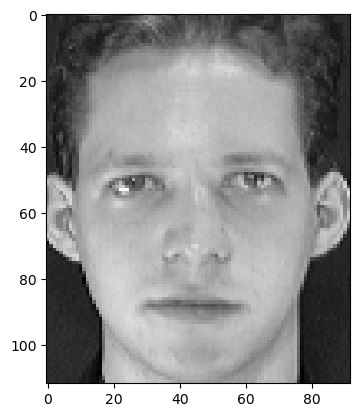

In [ ]:
# Check this code! You need to utilize it in your loop for problem 3.1!!!
row_vect = faceimages[[0],:,:] # Take out the 0th face image
col_vect = row_vect.reshape((10304,1))
print(col_vect)
plot_single_face(col_vect)


## Constructing the face-image matrix


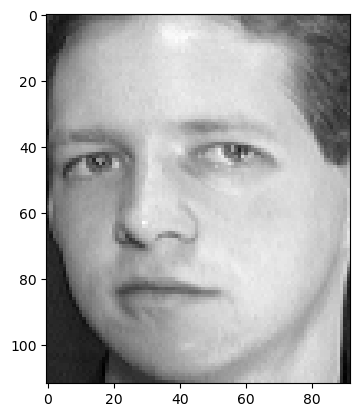

In [ ]:
# Loop section — ensure efficiency and proper termination
# The shape of faceimages are (200, 112, 92)
# where faceimage[i, :, :] is the i-th face image.
# Please generate the matrix A whose size is (10304, 200) according to face image
# The column vectors of matrix A will stands for the face images.

# Here you can reshape the 3-D array directly followed by a transpose operation
# if you're comfortable with multi-dimensional reshaping operations,
# OR
# you can generate A by writing a for loop [Recommended] (112*92 = 10304)
# please make sure each colums of A represents a face image

A = np.hstack([img.reshape(-1, 1) for img in faceimages])
# print the shape of the matrix A you generated

plot_single_face(A[:, 2]) # Make sure the plot is a human face

## PCA on the face-image matrix

In [6]:
# Define a helper function — comment added for clarity
def plot_eigenface(B_hat):
  k = B_hat.shape[1]
  fig, axes = plt.subplots(5,4,sharex=True,sharey=True,figsize=(8,10))
  for i in range(k):
    img_tmp = np.reshape(B_hat[:, i], (112, 92))
    axes[i//4][i%4].imshow(img_tmp, cmap="gray")
  plt.show()

In [ ]:
# center the face-image matrix A according to equation(7) on Page 6
A_bar =  A - np.mean(A, axis=1, keepdims=True)  # centered A

In [ ]:
# Step(b) Perform SVD on A_bar
# This step may take up to 1 min or longer, please be patient to wait.

U, sigma, V_T = np.linalg.svd(A_bar)
print(U.shape, sigma.shape, V_T.shape)

In [ ]:
# Conditional check — verify logic correctness
# Using the top k=20 principal components to contruct B_hat and W_hat
# Hint: Please use np.diag to generate a diagonal matrix if you don't know
# how to generate \Sigma matrix based on eigenvalues (sigma)

B_hat = U[:, :20]

W_hat =  np.diag(sigma[:20]) @ V_T[:20, :]# Both B_hat and W_hat are from eq (9) on Page 7
print(B_hat.shape, W_hat.shape) # Please check the dimensions

(10304, 20) (20, 200)


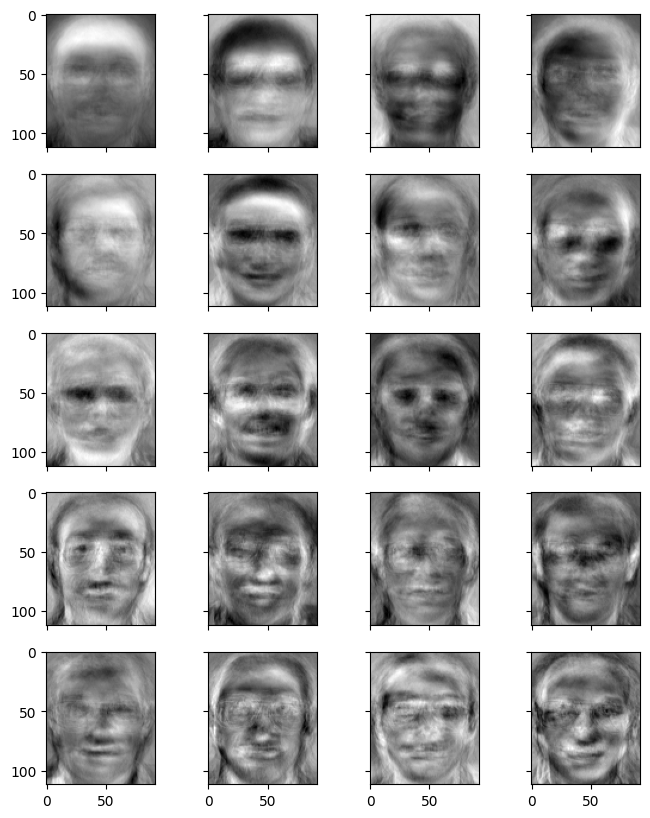

In [ ]:
# Plot the B_hat components
plot_eigenface(B_hat)

## Face recognition based on eigenfaces

In [ ]:
# Define a helper function — comment added for clarity
def visualize_recognition(ind, test_img, faceimages):
  plt.figure()
  plt.subplot(1, 2, 1)
  plt.imshow(np.squeeze(test_img, axis=0), cmap="gray") # Updated here
  plt.subplot(1, 2, 2)
  best_match = faceimages[ind, :, :]
  plt.imshow(best_match, cmap="gray")
  plt.show()

In [ ]:
# Here are 3 test images
test_img1 = faceimages_test[[15], :, :]
test_img2 = faceimages_test[[35], :, :]
test_img3 = faceimages_test[[75], :, :]

In [ ]:
# Step(a) Vectorize 3 test images
z_1 = test_img1.reshape(-1, 1)  #vectorize test_im
z_2 = test_img2.reshape(-1, 1)   #ectorize test_img2
z_3 = test_img1.reshape(-1, 1)  #vectorize test_img3

In [ ]:
# Step (b) Center each of the 3 vectors according to equation (10)
z_1_bar = z_1 - np.mean(A, axis=1, keepdims=True)  # center z_1
z_2_bar = z_2 - np.mean(A, axis=1, keepdims=True)  # center z_2
z_3_bar = z_3 - np.mean(A, axis=1, keepdims=True)

In [ ]:
# Step (c) Compute the representations of the 3 vectors with respect to the B_hat
# according to equation (11)
w_1 = B_hat.T @ z_1_bar  # caculate according to z_1_bar and B_hat
w_2 = B_hat.T @ z_2_bar  # caculate according to z_2_bar and B_hat
w_3 = B_hat.T @ z_2_bar  # caculate according to z_3_bar and B_hat

In [ ]:
# Loop section — ensure efficiency and proper termination
# Step (d) for each corresponding vector for the 3 test images,
# find its nearest neighbor in the training set: faceimages .
ind_1 = np.argmin(np.linalg.norm(W_hat - w_1, axis=0))  # find the index of the nearest neighbour according to w_1 and W_hat
ind_2 = np.argmin(np.linalg.norm(W_hat - w_2, axis=0))  # find the index of the nearest neighbour according to w_2 and W_hat
ind_3 = np.argmin(np.linalg.norm(W_hat - w_3, axis=0))  # find the index of the nearest neighbour according to w_3 and W_hat

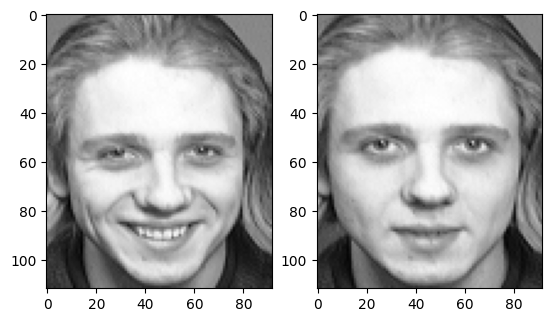

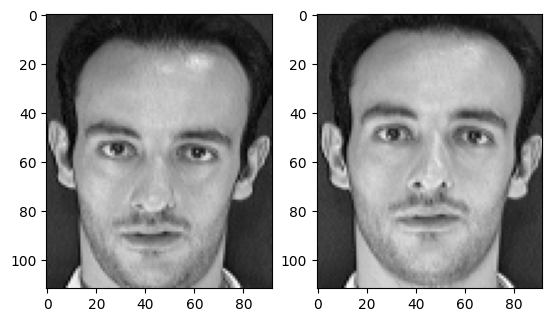

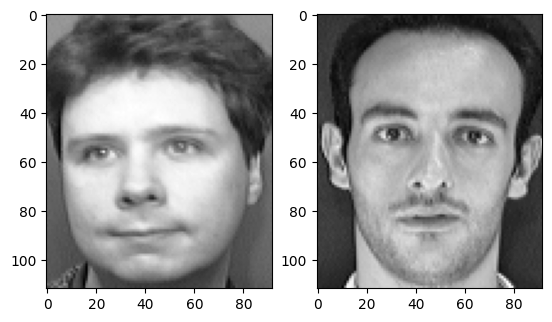

In [ ]:
visualize_recognition(ind_1, test_img1, faceimages)
visualize_recognition(ind_2, test_img2, faceimages)
visualize_recognition(ind_3, test_img3, faceimages)

# Image compression using the SVD

In [ ]:
# Define a helper function — comment added for clarity
# function that plots an image that is in a 2D array format
def visualize_rec_img(img):
  plt.figure()
  plt.imshow(img, cmap='gray')
  plt.show()

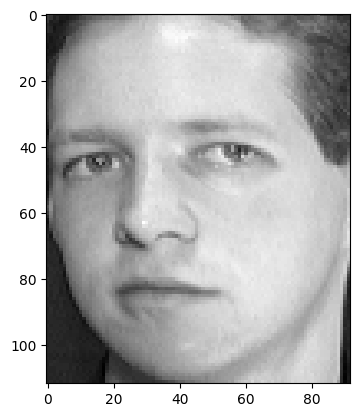

In [ ]:
# image we want to compress
img = np.reshape(A[:,2], (112,92))
visualize_rec_img(img)

##Compressing the images and visualizing them

In [ ]:
# Loop section — ensure efficiency and proper termination
# the number of singular values and vectors we want to look at
# to compare the different image compressions
num_singular_values = [1,5,10,15,20,40,92]
compressed_imgs = []
entries_stored = []

# compare the outputs of the different compressions
for k in num_singular_values:
  compressed_img = np.zeros(img.shape)
  U, S, V = np.linalg.svd(img)
  CS = np.diag(sigma[:k])
  CU = U[:, :k]
  CV = V[:k, :]
  compressed = CU @ CS @ CV
  compressed_imgs.append(compressed)
  num_entries = k + (k * V.shape[1])+(U.shape[0] * k)
  entries_stored.append(num_entries)




Compression using largest 1 singular values:



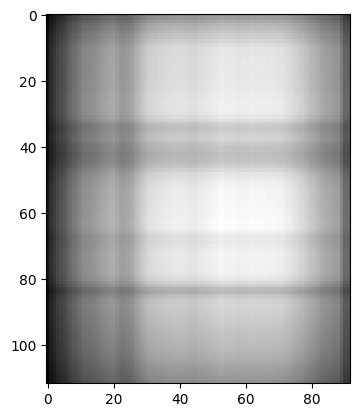




Compression using largest 5 singular values:



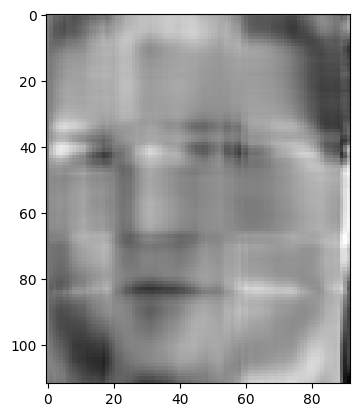




Compression using largest 10 singular values:



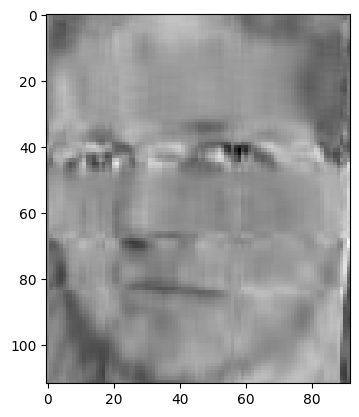




Compression using largest 15 singular values:



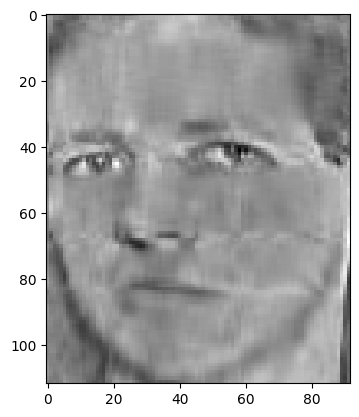




Compression using largest 20 singular values:



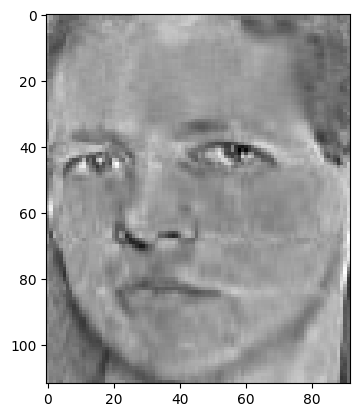




Compression using largest 40 singular values:



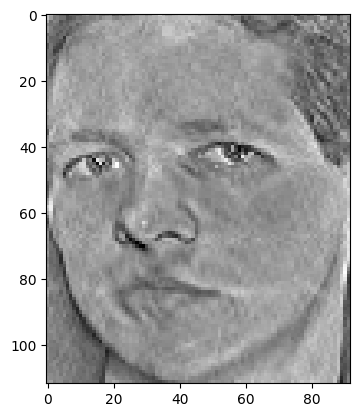




Compression using largest 92 singular values:



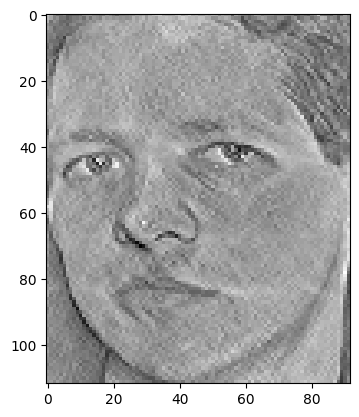

In [ ]:
# Loop section — ensure efficiency and proper termination
for i in range(len(compressed_imgs)):
  print(f"\n\n\nCompression using largest {num_singular_values[i]} singular values:\n")
  visualize_rec_img(compressed_imgs[i])

### Comparing storage for different the compressed images with respect to how many of the largest singular values and their respective singular vectors are used to reconstruct the image.

In [ ]:
# Loop section — ensure efficiency and proper termination
for i in range(len(num_singular_values)):
  print(f"Entries stored for compression using {num_singular_values[i]} largest singular values: {entries_stored[i]}")

Entries stored for compression using 1 largest singular values: 205
Entries stored for compression using 5 largest singular values: 1025
Entries stored for compression using 10 largest singular values: 2050
Entries stored for compression using 15 largest singular values: 3075
Entries stored for compression using 20 largest singular values: 4100
Entries stored for compression using 40 largest singular values: 8200
Entries stored for compression using 92 largest singular values: 18860


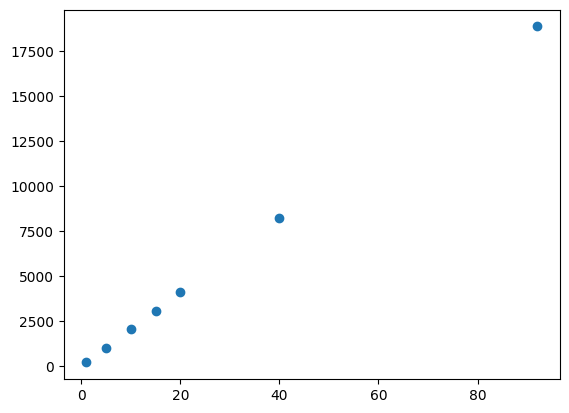

In [ ]:
# plot number of singular values vs storage
plt.figure()
plt.scatter(num_singular_values, entries_stored)
plt.show()

Original image: 


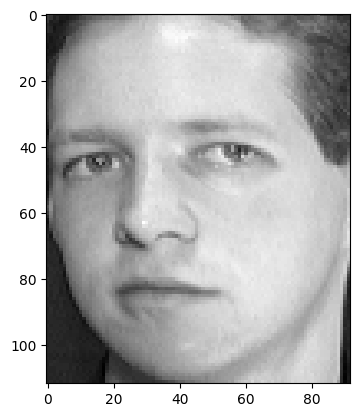



Chosen compressed image:


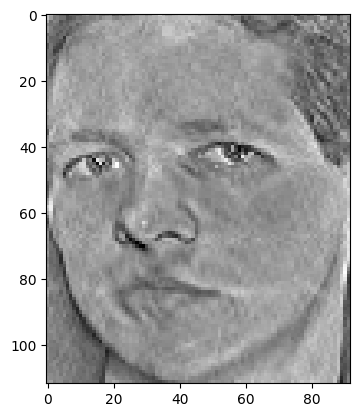



Storage space used relative to the original image 80%


In [ ]:
chosen_k = 92
# pick a value of k from the list [1,5,10,15,20,40,92]
# that seems to give a good reconstruction
# of the image but saves you a significant amount of space in storage
chosen_k = 40


index = num_singular_values.index(chosen_k)
print("Original image: ")
visualize_rec_img(img)
print("\n\nChosen compressed image:")
visualize_rec_img(compressed_imgs[index])
print(f"\n\nStorage space used relative to the original image {100*(entries_stored[index]/(112*92)):.0f}%")